<a href="https://colab.research.google.com/github/alifele/Brain_Computer_Interface-Competition-/blob/master/CNN_with_Time_Frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/content/drive/My Drive/EEG_BCI/')
import datafetch
import plotters

In [0]:
subj_1 = datafetch.fetch_subject(1)

In [3]:
subj_1.keys()

dict_keys(['test_data', 'train_data_class1', 'train_data_class2', 'train_data_class3', 'train_data_class4'])

In [0]:
from scipy import signal
import matplotlib.pyplot as plt

ERROR! Session/line number was not unique in database. History logging moved to new session 64


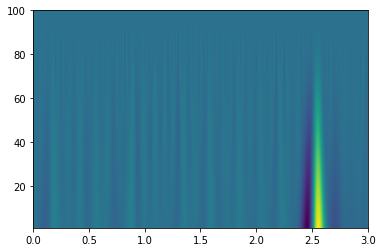

In [32]:
widths = np.arange(1, 100)
cwtmatr = signal.cwt(subj_1['test_data'][43][:,32], signal.ricker, widths)
#plt.imshow(cwtmatr, extent=[0, 3, 1, 100], aspect='auto',
 #          vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

plt.imshow(cwtmatr, extent=[0, 3, 1, 100], aspect='auto')

plt.show()

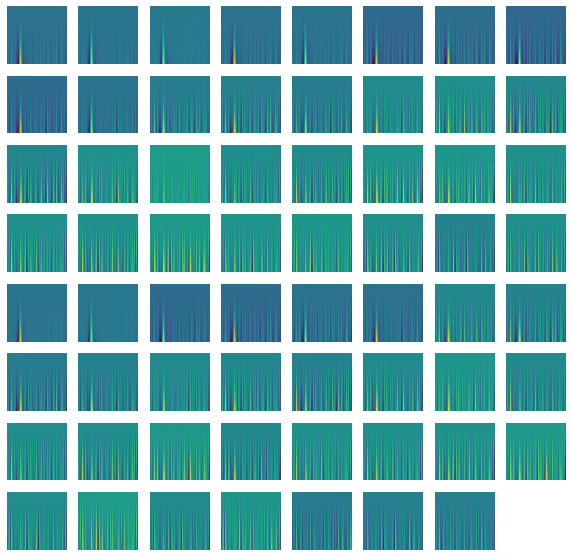

In [33]:
fig = plt.figure(figsize= (10,10))

for i in range(63):
  ax = fig.add_subplot(8,8,i+1)
  ax.imshow(signal.cwt(subj_1['train_data_class1'][12][:,i], signal.ricker, widths), extent=[0, 3, 1, 100], aspect='auto')
  ax.axis('off')

# Load data with 63 channels

In [0]:
global subj_list 
global selector

subj_list = [0,0,0,0,0,0]

In [0]:

def selector_desing(sector, classes=[1,4], trail=[0,24]):
  selector = []
  for i in range((sector-1)*5+1, sector*5+1):
    for j in range(classes[0],classes[1]+1):
      for k in range(0,trail[1]+1):
        selector.append((i,j,k))
  selector = np.array(selector)
  np.random.shuffle(selector)

  return selector

In [0]:
def update_subjlist(sector):

  if sector ==1:
    subj_1 = datafetch.fetch_subject(1)
    subj_2 = datafetch.fetch_subject(2)
    subj_3 = datafetch.fetch_subject(3)
    subj_4 = datafetch.fetch_subject(4)
    subj_5 = datafetch.fetch_subject(5)
    return np.array([subj_1, subj_2, subj_3, subj_4, subj_5, 1])


  if sector ==2:
    subj_6 = datafetch.fetch_subject(6)
    subj_7 = datafetch.fetch_subject(7)
    subj_8 = datafetch.fetch_subject(8)
    subj_9 = datafetch.fetch_subject(9)
    subj_10 = datafetch.fetch_subject(10)

    return np.array([0,0,0,0,0] + [subj_6, subj_7, subj_8, subj_9, subj_10, 2])


  if sector ==3:
    subj_11 = datafetch.fetch_subject(11)
    subj_12 = datafetch.fetch_subject(12)
    subj_13 = datafetch.fetch_subject(13)
    subj_14 = datafetch.fetch_subject(14)
    subj_15 = datafetch.fetch_subject(15)

    return np.array([0,0,0,0,0] + [0,0,0,0,0] + [subj_11, subj_12, subj_13, subj_14, subj_15, 3])

In [0]:
def select_data(select):
  '''
  it selects the data according the the selector.
  for exmaple if the seclevto os equal to (3,4,1) the
  data of subject number 1, which belongs to the class number 4, and its 1 trail 
  will be selected. which is a 7200 data point with 63 channels
  '''
  global subj_list

  return subj_list[select[0]-1]['train_data_class{}'.format(select[1])][select[2]]

In [0]:


def item_to_TF(item):

  global selector
  global subj_list
  
  '''
  function will get item (the index of the patient) and will return the hilbert 
  images that each channel of eeg will be different channels of the retured image

  This fuction will also return the label. for example the label 1 indicates that
  the patient belongs to the class number 1
  '''
  widths = np.arange(1, 100)
  mat = signal.cwt(select_data(selector[item])[:,0], signal.ricker, widths)
  mat = np.expand_dims(mat, axis=2)
  mats = mat
  label = selector[item][1]
  for i in range(1,63):
    mat = signal.cwt(select_data(selector[item])[:,i], signal.ricker, widths)
    mat = np.expand_dims(mat, axis=2)
    mats = np.concatenate((mats, mat), axis=2)

  return mats, label



In [0]:
def load_TF_batch(n=[0, 2],sector=1):
  global subj_list
  global selector

  labels = []

  Data = []
  if sector != subj_list[-1]:
    subj_list = update_subjlist(sector)
    selector = selector_desing(sector)

  data, label = item_to_TF(n[0])
  Data.append(data)
  labels.append(label)
  for i in range(n[0]+1, n[1]):
    data, label  = item_to_TF(i)
    labels.append(label)
    Data.append(data)

  '''
  Label = []
  pre_data = []

  for i in Data:
    pre_data+=i

  #for j in labels:
    #Label += j

  #labels = Label
  Data = pre_data
   '''


  return np.array(Data), np.array(labels)

In [0]:
data , label = load_TF_batch(n=[0,2], sector=1)

In [25]:
data.shape

(2, 99, 7200, 63)

In [26]:
label.shape

(2,)

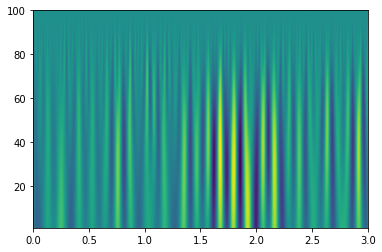

In [31]:
plt.imshow(data[0][:,:,23],extent=[0, 3, 1, 100], aspect='auto')

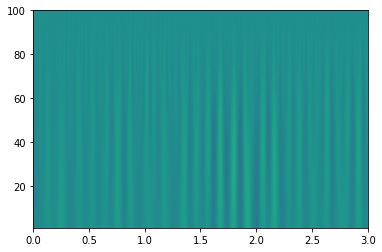

In [30]:
plt.imshow(data[0][:,:,23], extent=[0, 3, 1, 100], aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())